In [1]:
import requests
import json
import pickle


In [2]:
with open('watsoniotp.healthy.phase_aligned.pickle','rb') as file_object:
    raw_data = file_object.read()
    data_healthy = pickle.loads(raw_data, encoding='latin1')

with open('watsoniotp.broken.phase_aligned.pickle','rb') as file_object:
    raw_data = file_object.read()
    data_broken = pickle.loads(raw_data, encoding='latin1')

In [3]:
data_healthy = data_healthy.tolist()
data_healthy = json.dumps(data_healthy)
#data = data[1:-1] # get rid of encapsulating quotes
data_broken = data_broken.tolist()
data_broken = json.dumps(data_broken)

In [4]:
url = "http://localhost:8080/send_data"
#url = 'https://claimed-anomaly-score-unsupervised.s0wzrxgjkc8.eu-de.codeengine.appdomain.cloud/send_data'
headers = {'Content-type': 'application/json', 'Accept': 'text/plain'}
for _ in range(3):
    r = requests.post(url, data=data_healthy, headers=headers)
    assert(r.status_code==200)

In [5]:
r = requests.post(url, data=data_broken, headers=headers)
assert(r.status_code==200)

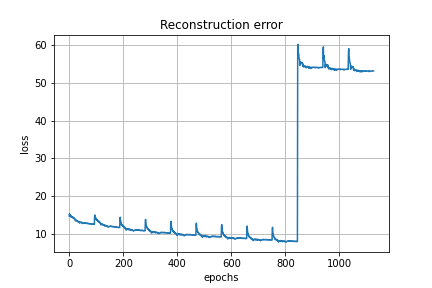

In [6]:
from IPython.display import Image
Image("http://localhost:8080/get_loss_as_image.png")